Importing Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


Data Understanding / Loading Dataset

In [ ]:
# Load the dataset from the provided Excel file
file_path = '/content/BLOG GENDER BALANCED.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows of the dataframe
print("First few rows of the dataframe:")
print(df.head())


# Display basic information about the dataframe
print("\nDataframe info:")
print(df.info())

# Display summary statistics of the dataframe
print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())



First few rows of the dataframe:
                                                BLOG GENDER
0   Beyond Getting There: What Travel Days Show U...      F
1  I remember so much about the island; the large...      F
2  I have had asthma and allergies my entire life...      M
3  The last few days have been an emotional rolle...      M
4  If you lined up all the teachers and staff in ...      F

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   BLOG    2599 non-null   object
 1   GENDER  2600 non-null   object
dtypes: object(2)
memory usage: 40.8+ KB
None

Summary statistics:
                                                     BLOG GENDER
count                                                2599   2600
unique                                               2588      2
top     Welcome to Grade 1: "Alright students, what do...      F
freq         

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:241: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


DATA PREPRATION

In [ ]:
# Drop rows with missing values
df_clean = df.dropna().copy()

# Encode the gender labels
label_encoder = LabelEncoder()
df_clean['GENDER'] = label_encoder.fit_transform(df_clean['GENDER'])

# Extract features and labels
X = df_clean['BLOG']
y = df_clean['GENDER']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

MODELING

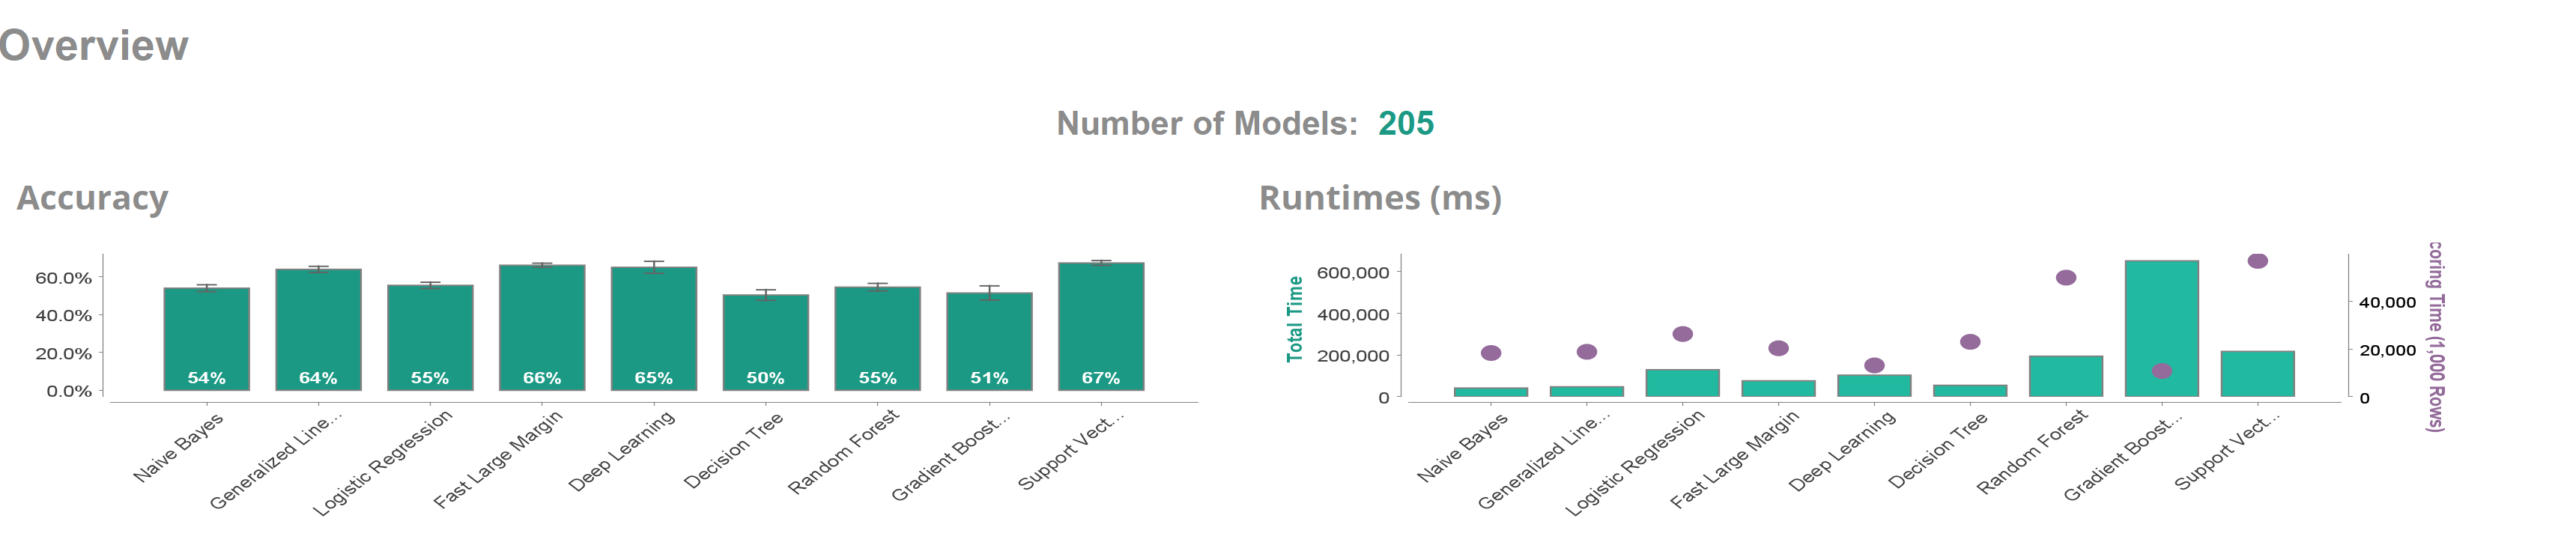

Python Implementation of SVM:

In [ ]:
# Initialize and train the Support Vector Machine model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))



Accuracy: 0.6730769230769231

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       251
           1       0.69      0.67      0.68       269

    accuracy                           0.67       520
   macro avg       0.67      0.67      0.67       520
weighted avg       0.67      0.67      0.67       520



Evaluation

In [ ]:
# Evaluate the model's performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm}")

# Generate a classification report
report_svm = classification_report(y_test, y_pred_svm)
print("\nClassification Report:")
print(report_svm)

Accuracy: 0.6730769230769231

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       251
           1       0.69      0.67      0.68       269

    accuracy                           0.67       520
   macro avg       0.67      0.67      0.67       520
weighted avg       0.67      0.67      0.67       520

